In [52]:
%%time
import time
from windpowerlib import data as wt 

df = wt.get_turbine_types()

       manufacturer  turbine_type  has_power_curve  has_cp_curve
0       Adwen/Areva    AD116/5000             True         False
1           Enercon    E-101/3050             True          True
2           Enercon    E-101/3500             True          True
3           Enercon    E-115/3000             True          True
4           Enercon    E-115/3200             True          True
5           Enercon    E-126/4200             True          True
6           Enercon    E-126/7500             True         False
7           Enercon    E-126/7580             True         False
8           Enercon    E-141/4200             True          True
9           Enercon      E-53/800             True          True
10          Enercon     E-70/2000             True         False
11          Enercon     E-70/2300             True          True
12          Enercon     E-82/2000             True          True
13          Enercon     E-82/2300             True          True
14          Enercon     E

9692660926.076874


C:\Users\Caj\AppData\Local\Temp\ipykernel_4604\2658634186.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  weather.index = pd.to_datetime(weather.index)


<Axes: >

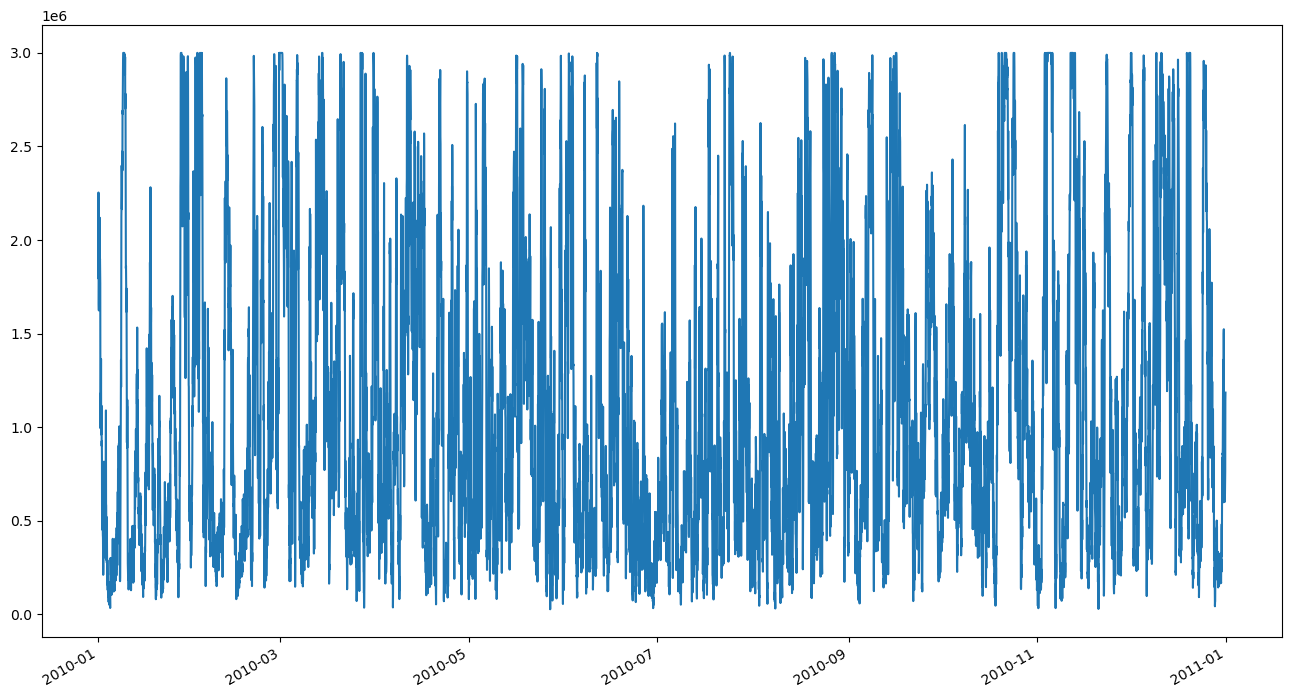

In [13]:
import pandas as pd 
from windpowerlib import data as wt 
from windpowerlib import ModelChain, WindTurbine

# df = wt.get_turbine_types()

E_101 = WindTurbine(hub_height=135, 
                    turbine_type= "E-101/3050")
E_101_mc = ModelChain(E_101)

weather = pd.read_csv('windpowerlib_weather.csv',
                     index_col=0,
                     header=[0,1])
weather.index = pd.to_datetime(weather.index)
E_101_mc.run_model(weather)

E_101_energy = E_101_mc.power_output.sum()
print(E_101_energy)
E_101_mc.power_output.plot(figsize=(16,9))

C:\Users\Caj\AppData\Local\Temp\ipykernel_4604\2695948151.py:24: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`



E-101/3050 Energy: 9692660926.076874
E-115/3200 Energy: 9890531731.517351
V117/3600 Energy: 10080207261.59788


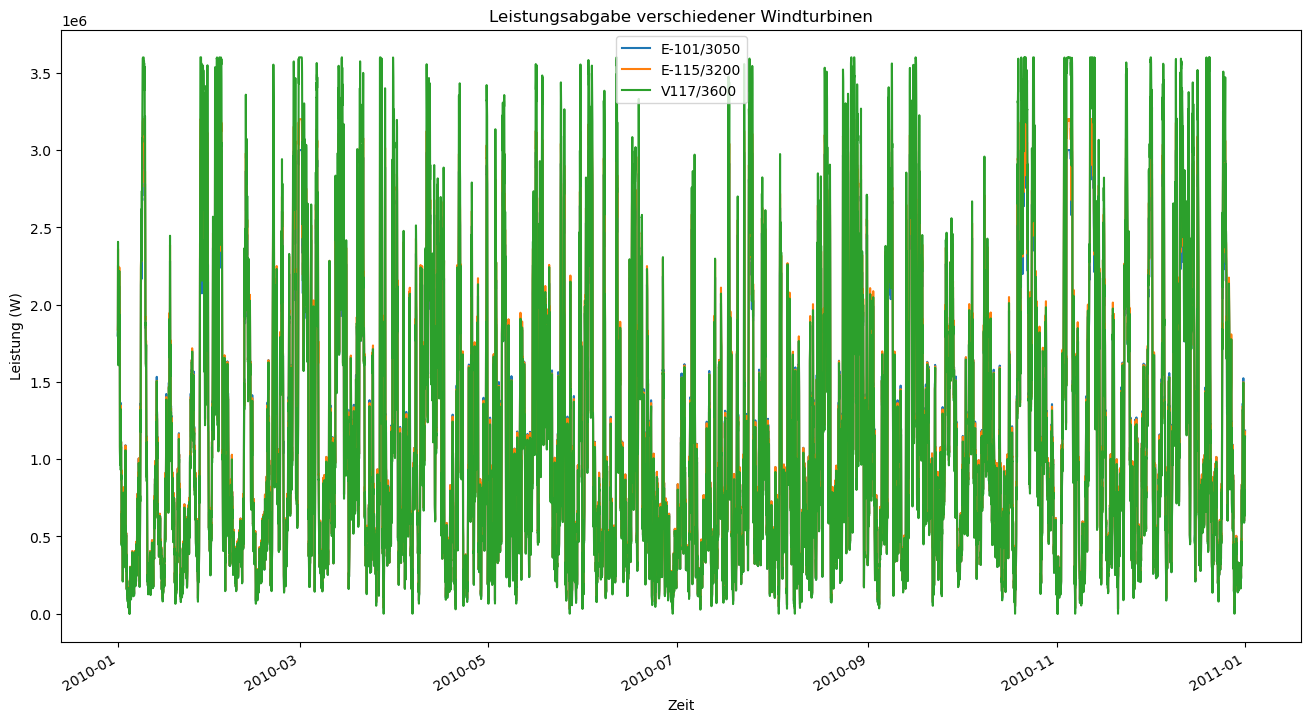

Gesamte Berechnungsdauer: 0.51 Sekunden


In [58]:
# mehrere Analgen in einem Diagramm 
import time
import pandas as pd
import matplotlib.pyplot as plt
from windpowerlib import WindTurbine, ModelChain

###################

# Zeitmessung starten
start_time = time.time()

###################

# Dictionary der Turbinen und ihrer Höhen
turbines = {
    "E-101/3050": 135,
    "E-115/3200": 135,
    "V117/3600":135
    # Weitere Turbinen können hier hinzugefügt werden
}

# Lade Wetterdaten
weather = pd.read_csv('windpowerlib_weather.csv', index_col=0, header=[0, 1])
weather.index = pd.to_datetime(weather.index)

# Erstelle ein Diagramm
plt.figure(figsize=(16, 9))

# Schleife über jedes Turbinenpaar
for turbine_type, hub_height in turbines.items():
    turbine = WindTurbine(hub_height=hub_height, turbine_type=turbine_type)
    mc = ModelChain(turbine)
    mc.run_model(weather)
    energy = mc.power_output.sum()
    print(f"{turbine_type} Energy: {energy}")
    
    # Plot the power output
    mc.power_output.plot(label=turbine_type)

# Diagramm konfigurieren
plt.xlabel('Zeit')
plt.ylabel('Leistung (W)')
plt.title('Leistungsabgabe verschiedener Windturbinen')
plt.legend()
plt.show()

#####################
# Zeitmessung beenden und Ausgabe der Dauer
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Gesamte Berechnungsdauer: {elapsed_time:.2f} Sekunden")

C:\Users\Caj\AppData\Local\Temp\ipykernel_4604\2069899474.py:25: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`



E-101/3050 Energy: 9692660926.076874
E-115/3200 Energy: 9890531731.517351
N117/2400 Energy: 9239623011.393574


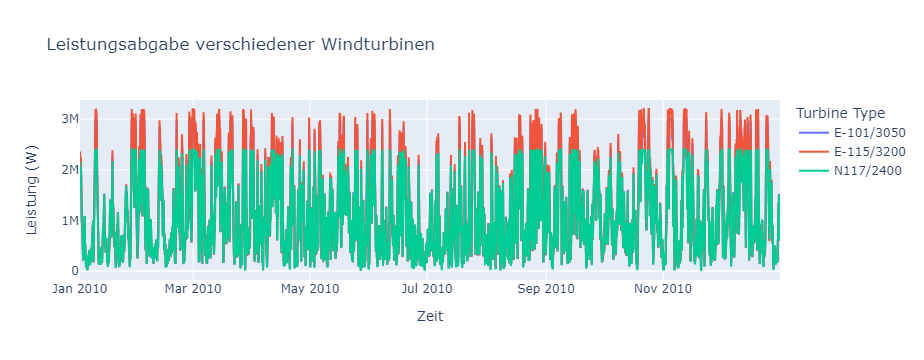

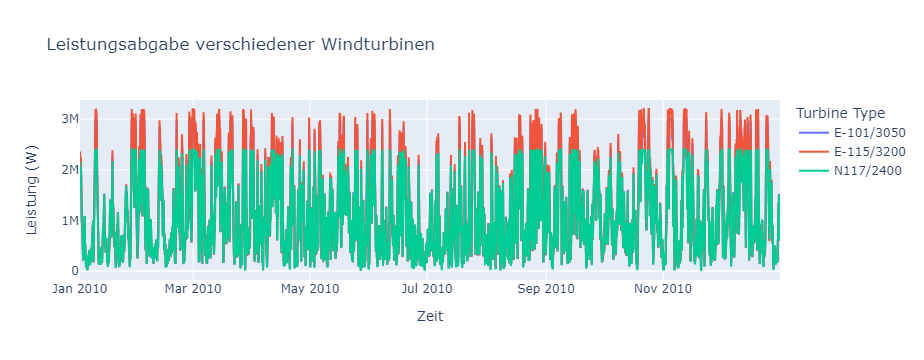

Gesamte Berechnungsdauer: 1.66 Sekunden


In [64]:
# interactives Diagramm 
import time 
import pandas as pd
import plotly.graph_objects as go
from windpowerlib import WindTurbine, ModelChain

###################

# Zeitmessung starten
start_time = time.time()

###################


# Dictionary der Turbinen und ihrer Höhen
turbines = {
    "E-101/3050": 135,
    "E-115/3200": 135,
    "N117/2400": 135
    # Weitere Turbinen können hier hinzugefügt werden
}

# Lade Wetterdaten
weather = pd.read_csv('windpowerlib_weather.csv', index_col=0, header=[0, 1])
weather.index = pd.to_datetime(weather.index)

# Erstelle eine Figur mit Plotly
fig = go.Figure()

# Schleife über jedes Turbinenpaar
for turbine_type, hub_height in turbines.items():
    turbine = WindTurbine(hub_height=hub_height, turbine_type=turbine_type)
    mc = ModelChain(turbine)
    mc.run_model(weather)
    energy = mc.power_output.sum()
    print(f"{turbine_type} Energy: {energy}")
    
    # Füge die Leistungsabgabe zum Plot hinzu
    fig.add_trace(go.Scatter(x=mc.power_output.index, y=mc.power_output.values, mode='lines', name=turbine_type))

# Diagramm konfigurieren
fig.update_layout(
    title='Leistungsabgabe verschiedener Windturbinen',
    xaxis_title='Zeit',
    yaxis_title='Leistung (W)',
    legend_title='Turbine Type'
)

# Zeige das interaktive Diagramm
# fig.show()
display(fig)




#####################
# Zeitmessung beenden und Ausgabe der Dauer
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Gesamte Berechnungsdauer: {elapsed_time:.2f} Sekunden")

In [40]:
%%time
# Deine Berechnungen hier
import time
time.sleep(2)
print("Fertig!")


Fertig!
CPU times: total: 0 ns
Wall time: 2 s
